# 对Lending Club进行数据分析

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
pd.set_option('display.max_columns', None)  #显示所有列
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

### 将2018Q1-Q4的数据集导入

In [3]:
data1=pd.read_csv('2018Q1.csv',encoding='gbk')  #以gbk方式编码，utf-8会报错
data2=pd.read_csv('2018Q2.csv',encoding='gbk')
data3=pd.read_csv('2018Q3.csv',encoding='gbk')
data4=pd.read_csv('2018Q4.csv',encoding='gbk')

In [4]:
data1['loan_status'].value_counts()

Current               57425
Fully Paid            36325
Charged Off           11139
Late (31-120 days)     1401
In Grace Period        1097
Late (16-30 days)       308
Default                  64
Name: loan_status, dtype: int64

In [5]:
data2['loan_status'].value_counts()

Current               77755
Fully Paid            36469
Charged Off           12429
Late (31-120 days)     2057
In Grace Period        1387
Late (16-30 days)       442
Default                  94
Name: loan_status, dtype: int64

In [6]:
data3['loan_status'].value_counts()

Current               84632
Fully Paid            30667
Charged Off            8836
Late (31-120 days)     2009
In Grace Period        1406
Late (16-30 days)       420
Default                  89
Name: loan_status, dtype: int64

In [7]:
data4['loan_status'].value_counts()

Current               92485
Fully Paid            24821
Charged Off            6766
Late (31-120 days)     2210
In Grace Period        1405
Late (16-30 days)       486
Default                 111
Name: loan_status, dtype: int64

In [8]:
data=pd.concat([data1,data2,data3,data4])  #四个数据集表合并
data = data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]   #只保留 这两种状态的行，完全付清和欠债
data=data.reset_index(drop=True)    #重置索引

In [9]:
missing_fractions = data.isnull().mean().sort_values(ascending=False)   #得到缺失值的比例
missing_fractions.head(10)

next_pymnt_d                                  1.000000
desc                                          1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.998376
hardship_type                                 0.996274
hardship_reason                               0.996274
hardship_last_payment_amount                  0.996274
hardship_payoff_balance_amount                0.996274
hardship_status                               0.996274
hardship_loan_status                          0.996274
dtype: float64

Text(0,0.5,'特征个数')

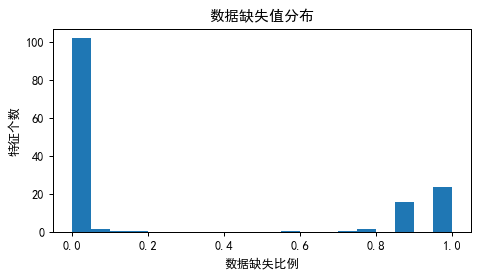

In [10]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('数据缺失值分布')
plt.xlabel('数据缺失比例')
plt.ylabel('特征个数')

### 将缺失值大于30%的数据删除

In [11]:
ratio=0.3
drop_list=[];
drop_list = sorted(list(missing_fractions[missing_fractions > ratio].index))
print(drop_list)

['annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlem

In [12]:
len(drop_list)   #ratio=0.4 len=43; ratio=0.3 len=44 ;ratio=0.2 len=44;ratio=0.1 len=47 故可以选用0.3或者0.2比较合适

44

In [13]:
data.drop(labels=drop_list, axis=1, inplace=True)

In [14]:
data.shape

(167452, 106)

In [15]:
print(sorted(data1.columns))   #所有的特征

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last

In [16]:
print(sorted(data.columns))   #删除了缺失值过多的特征，剩余的特征

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'n

In [17]:
keep_list=['id','loan_status','acc_now_delinq','addr_state','annual_inc','avg_cur_bal',
                    'bc_util','chargeoff_within_12_mths','delinq_2yrs','delinq_amnt','dti',
                     'emp_length','emp_title','fico_range_high','fico_range_low','sub_grade','home_ownership',
                     'il_util','int_rate','last_fico_range_high','last_fico_range_low','num_accts_ever_120_pd',
                     'num_actv_rev_tl','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
                     'open_acc','hardship_flag','open_act_il','mort_acc','grade'];        #进一步进行筛选

df=data[keep_list]

In [18]:
len(keep_list)

32

In [19]:
df.shape

(167452, 32)

In [20]:
df.head()

,id,loan_status,acc_now_delinq,addr_state,annual_inc,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,emp_length,emp_title,fico_range_high,fico_range_low,sub_grade,home_ownership,il_util,int_rate,last_fico_range_high,last_fico_range_low,num_accts_ever_120_pd,num_actv_rev_tl,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,open_acc,hardship_flag,open_act_il,mort_acc,grade
0,130910225,Fully Paid,0,TX,40000.0,10977.0,50.0,0,0,0,20.25,< 1 year,Parole,699,695,B5,MORTGAGE,102.0,11.98%,649,645,3,2,13,0.0,0,0,13,N,6,0,B
1,130942737,Fully Paid,0,NY,85000.0,8551.0,38.4,0,1,0,15.76,10+ years,Machine operator,669,665,D4,OWN,NaN,20.39%,654,650,0,7,15,0.0,0,0,15,N,1,3,D
2,130951046,Fully Paid,0,NY,150000.0,2603.0,9.9,0,0,0,4.09,10+ years,Private Mortgage Banker,734,730,B1,MORTGAGE,41.0,9.43%,779,775,0,2,6,0.0,0,0,6,N,1,0,B
3,130967561,Fully Paid,0,NC,103000.0,6373.0,26.5,0,0,0,30.76,6 years,Corporate Ergonomist,724,720,B4,MORTGAGE,91.0,10.90%,789,785,1,4,12,0.0,0,0,12,N,3,1,B
4,130965526,Charged Off,0,NY,94000.0,17568.0,33.1,0,0,0,14.26,7 years,Sales consultant,744,740,C5,MORTGAGE,59.0,16.01%,564,560,0,3,13,0.0,0,0,13,N,3,1,C


### 进一步处理和可视化

In [21]:
#画boxPlot函数
def plotBox(col_name, full_name):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    
    sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(full_name + ' by Loan Status')

    plt.tight_layout()

In [22]:
#画barPlot函数
def plotBar(col_name, full_name):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']   
#         print(df.groupby(col_name)['loan_status'].value_counts(normalize=True))
    sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax1)
    ax1.set_ylabel('Fraction of Loans Charged-off')
    ax1.set_title('Charge-off Rate by ' + full_name)
    ax1.set_xlabel(full_name)
    
    fully_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  #不进行归一化
    sns.barplot(x=fully_rates.index, y=fully_rates.values, color='#5975A4', saturation=1, ax=ax2)
    ax2.set_ylabel('Fraction of Loans Fully-paid')
    ax2.set_title('Fully-paid Rate by '+full_name )
    ax2.set_xlabel(full_name)    
    plt.tight_layout()
    

In [23]:
#画countPlot函数
def plotCount(col_name,full_name):
    f,ax=plt.subplots(figsize=(12,3),dpi=90)
    sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax)
    ax.set_xlabel(full_name)
    ax.set_ylabel('Count')
    ax.set_title(full_name)

### 1.int_rate

In [24]:
# 将 int_rate列由百分数格式转化为浮点数格式
df['int_rate'] = df['int_rate'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
df.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,loan_status,acc_now_delinq,addr_state,annual_inc,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,emp_length,emp_title,fico_range_high,fico_range_low,sub_grade,home_ownership,il_util,int_rate,last_fico_range_high,last_fico_range_low,num_accts_ever_120_pd,num_actv_rev_tl,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,open_acc,hardship_flag,open_act_il,mort_acc,grade
0,130910225,Fully Paid,0,TX,40000.0,10977.0,50.0,0,0,0,20.25,< 1 year,Parole,699,695,B5,MORTGAGE,102.0,0.1198,649,645,3,2,13,0.0,0,0,13,N,6,0,B
1,130942737,Fully Paid,0,NY,85000.0,8551.0,38.4,0,1,0,15.76,10+ years,Machine operator,669,665,D4,OWN,NaN,0.2039,654,650,0,7,15,0.0,0,0,15,N,1,3,D
2,130951046,Fully Paid,0,NY,150000.0,2603.0,9.9,0,0,0,4.09,10+ years,Private Mortgage Banker,734,730,B1,MORTGAGE,41.0,0.0943,779,775,0,2,6,0.0,0,0,6,N,1,0,B
3,130967561,Fully Paid,0,NC,103000.0,6373.0,26.5,0,0,0,30.76,6 years,Corporate Ergonomist,724,720,B4,MORTGAGE,91.0,0.1090,789,785,1,4,12,0.0,0,0,12,N,3,1,B
4,130965526,Charged Off,0,NY,94000.0,17568.0,33.1,0,0,0,14.26,7 years,Sales consultant,744,740,C5,MORTGAGE,59.0,0.1601,564,560,0,3,13,0.0,0,0,13,N,3,1,C


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


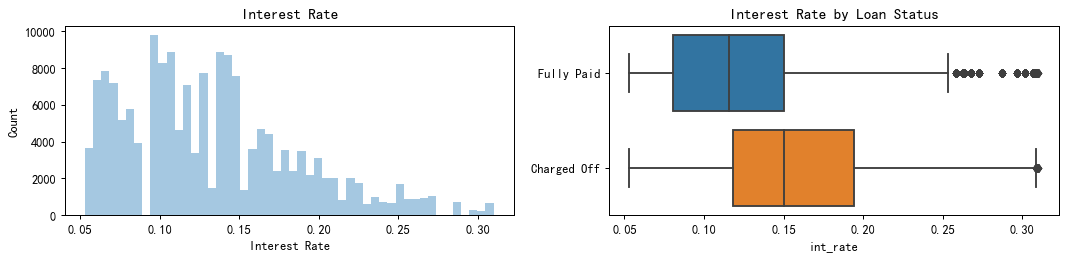

In [25]:
plotBox('int_rate', 'Interest Rate')

In [26]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.158321,0.055099,0.0531,0.1180,0.1504,0.1942,0.3099
Fully Paid,128282.0,0.124621,0.051388,0.0531,0.0808,0.1155,0.1505,0.3099


### 2.sub_grade,  grade(选择一个使用)

In [27]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


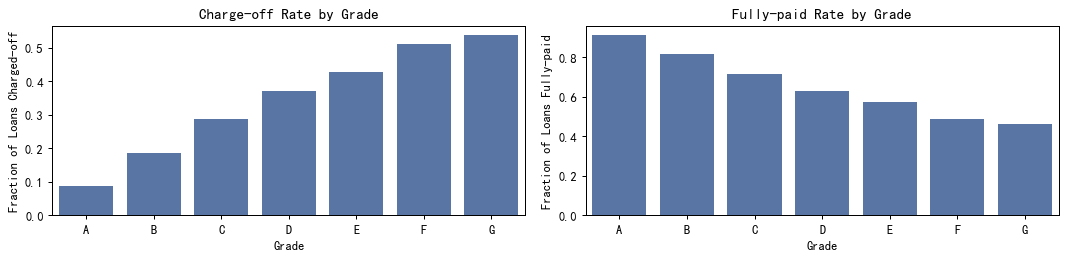

In [28]:
plotBar('grade','Grade')

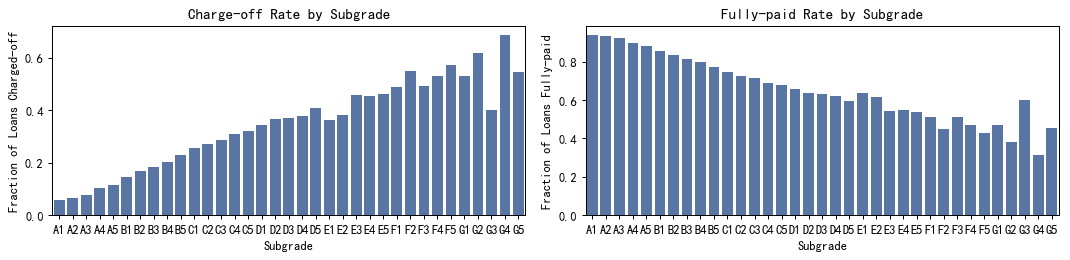

In [29]:
plotBar('sub_grade', 'Subgrade')

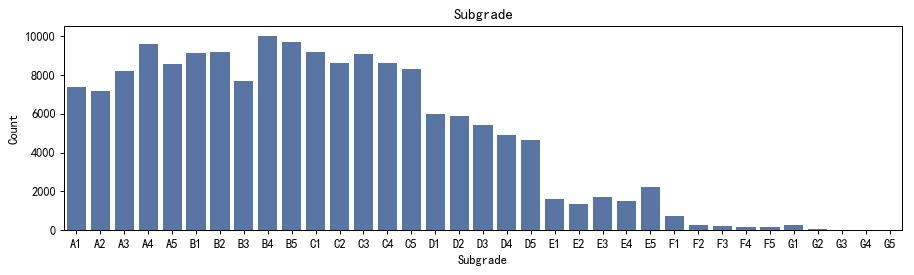

In [30]:
plotCount('sub_grade','Subgrade')

### 3.emp_title

In [31]:
df['emp_title'].describe()    

count      150211
unique      54427
top       Manager
freq         2916
Name: emp_title, dtype: object

In [32]:
df.drop(labels='emp_title', axis=1, inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
df.head()

,id,loan_status,acc_now_delinq,addr_state,annual_inc,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,emp_length,fico_range_high,fico_range_low,sub_grade,home_ownership,il_util,int_rate,last_fico_range_high,last_fico_range_low,num_accts_ever_120_pd,num_actv_rev_tl,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,open_acc,hardship_flag,open_act_il,mort_acc,grade
0,130910225,Fully Paid,0,TX,40000.0,10977.0,50.0,0,0,0,20.25,< 1 year,699,695,B5,MORTGAGE,102.0,0.1198,649,645,3,2,13,0.0,0,0,13,N,6,0,B
1,130942737,Fully Paid,0,NY,85000.0,8551.0,38.4,0,1,0,15.76,10+ years,669,665,D4,OWN,NaN,0.2039,654,650,0,7,15,0.0,0,0,15,N,1,3,D
2,130951046,Fully Paid,0,NY,150000.0,2603.0,9.9,0,0,0,4.09,10+ years,734,730,B1,MORTGAGE,41.0,0.0943,779,775,0,2,6,0.0,0,0,6,N,1,0,B
3,130967561,Fully Paid,0,NC,103000.0,6373.0,26.5,0,0,0,30.76,6 years,724,720,B4,MORTGAGE,91.0,0.1090,789,785,1,4,12,0.0,0,0,12,N,3,1,B
4,130965526,Charged Off,0,NY,94000.0,17568.0,33.1,0,0,0,14.26,7 years,744,740,C5,MORTGAGE,59.0,0.1601,564,560,0,3,13,0.0,0,0,13,N,3,1,C


### 4.emp_length

In [34]:
#将字符串年数转化为整型
df['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

df['emp_length'] = df['emp_length'].apply(emp_length_to_int)

E:\Anaconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [35]:
df['emp_length'].value_counts(dropna=False).sort_index()

 0.0     13867
 1.0     11247
 2.0     15320
 3.0     14022
 4.0     10779
 5.0     10439
 6.0      7481
 7.0      6144
 8.0      5459
 9.0      4285
 10.0    53807
NaN      14602
Name: emp_length, dtype: int64

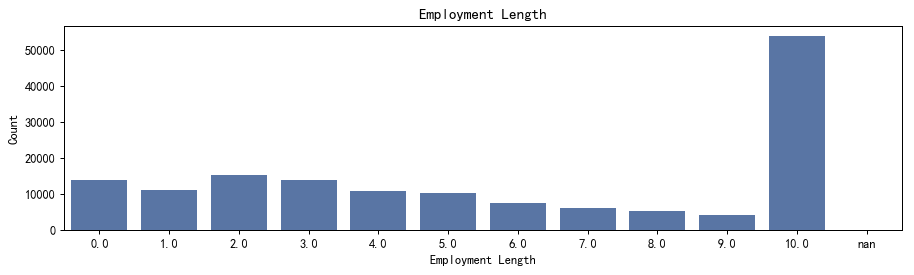

In [36]:
plotCount('emp_length','Employment Length')

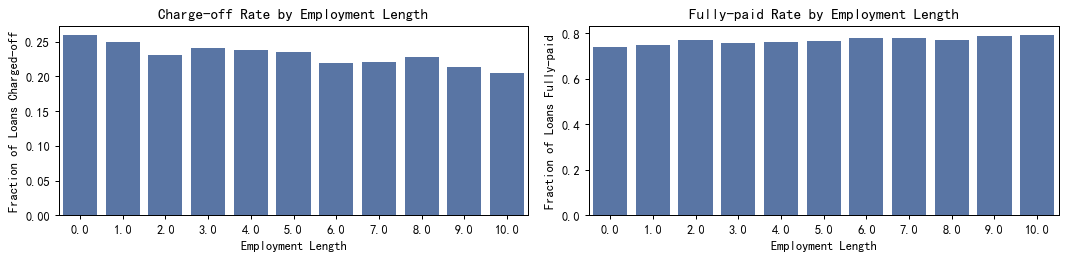

In [37]:
plotBar('emp_length','Employment Length')

### 5.home_ownership

In [38]:
df['home_ownership'].value_counts()

MORTGAGE    83158
RENT        63481
OWN         20689
ANY           124
Name: home_ownership, dtype: int64

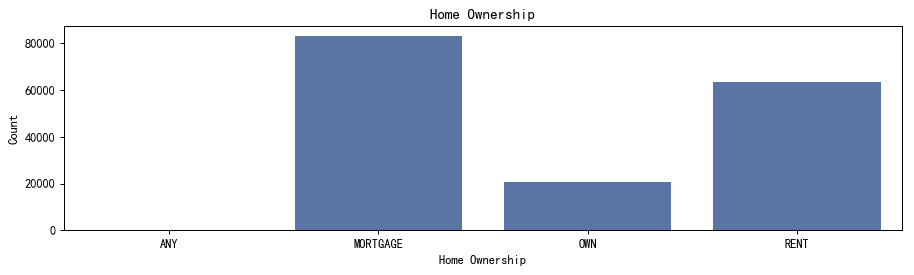

In [39]:
plotCount('home_ownership','Home Ownership')

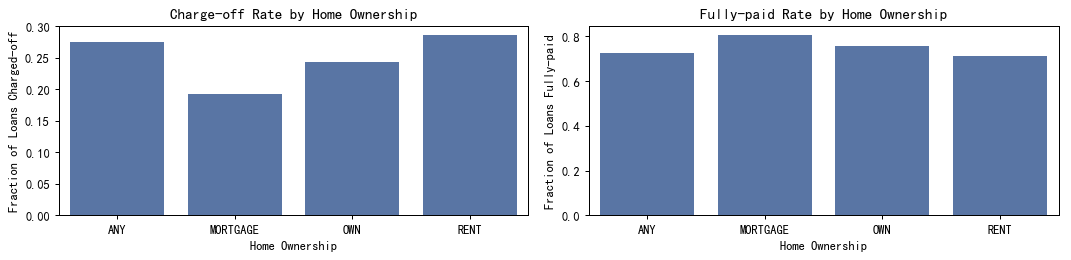

In [40]:
plotBar('home_ownership','Home Ownership')

### 6.annual_inc

In [41]:
df['annual_inc'].describe()

count    1.674520e+05
mean     7.866181e+04
std      7.670690e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.500000e+04
max      9.300000e+06
Name: annual_inc, dtype: float64

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


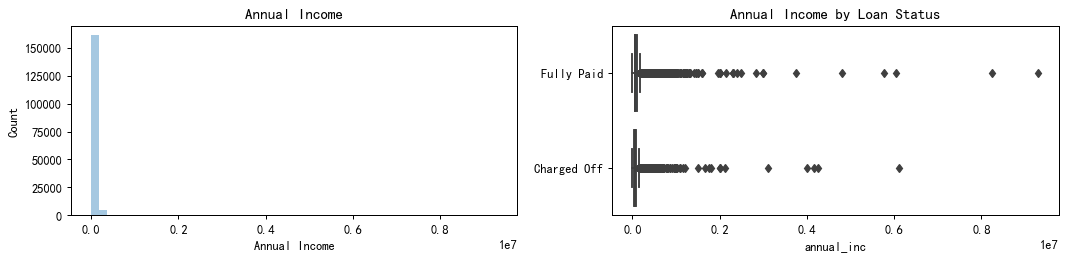

In [42]:
plotBox('annual_inc','Annual Income')

In [43]:
df['log_annual_inc']=df['annual_inc'].apply(lambda x: np.log10(x+1))   #由于数值分布差异过大，进行log变换

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df.drop('annual_inc', axis=1, inplace=True)     #删除原来的annual_inc

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
df['log_annual_inc'].describe()

count    167452.000000
mean          4.806815
std           0.352971
min           0.000000
25%           4.662767
50%           4.812920
75%           4.977728
max           6.968483
Name: log_annual_inc, dtype: float64

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


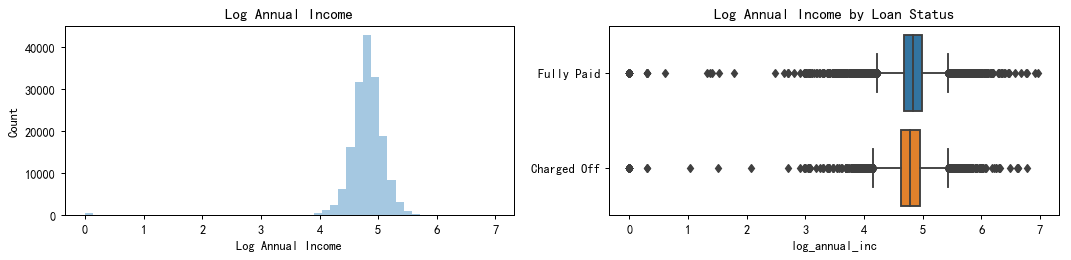

In [46]:
plotBox('log_annual_inc','Log Annual Income')

### 7.addr_state

In [47]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()   
# 从排序可以看出来不同地区有一定差异
# ME :~0.11      MS:~0.30

addr_state
ME    0.108511
VT    0.112426
ID    0.137628
UT    0.145219
WV    0.149367
WY    0.151515
WA    0.163909
SC    0.166829
OR    0.167869
CO    0.170367
DC    0.172012
MT    0.177243
ND    0.177515
NH    0.179423
KS    0.195242
AK    0.196319
RI    0.203779
KY    0.206961
OH    0.208643
VA    0.213614
DE    0.217304
IL    0.219074
MI    0.220027
AZ    0.222851
MA    0.222936
TN    0.227780
PA    0.232554
IN    0.233036
NE    0.233656
NM    0.233945
NC    0.235010
CT    0.235516
SD    0.236686
NJ    0.238017
MN    0.239014
NV    0.239073
GA    0.239297
CA    0.239626
TX    0.240091
MO    0.244378
WI    0.245308
MD    0.248631
HI    0.250000
LA    0.258278
OK    0.263854
AL    0.269072
FL    0.271202
NY    0.290253
AR    0.294071
MS    0.299709
Name: loan_status, dtype: float64

### 8.dti

In [48]:
df['dti'].describe()

count    167018.000000
mean         19.160343
std          20.915619
min           0.000000
25%          10.930000
50%          17.200000
75%          24.530000
max         999.000000
Name: dti, dtype: float64

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


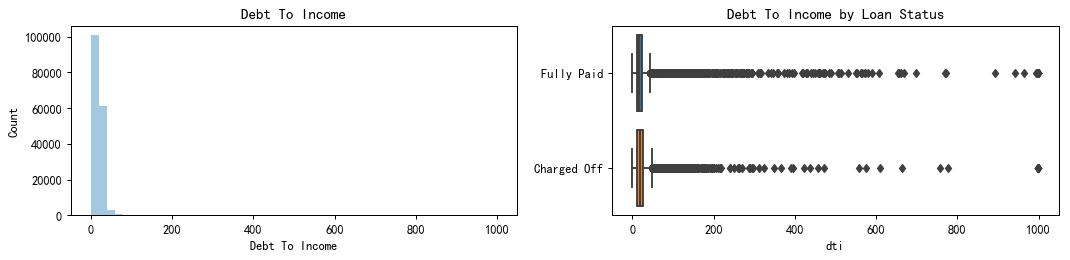

In [49]:
plotBox('dti','Debt To Income')    #离群值过多

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Debt-to-income Ratio')

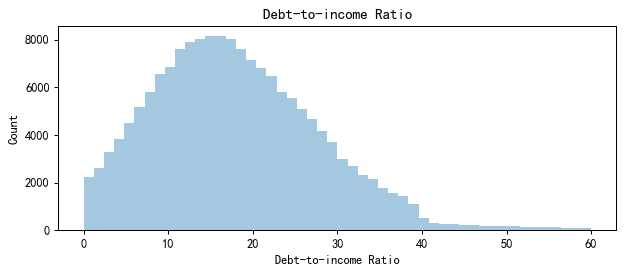

In [50]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

### 9.fico_range_low,fico_range_high

In [51]:
df[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,167452.000000,167452.000000
mean,706.640799,710.641055
std,36.850756,36.851723
min,660.000000,664.000000
25%,680.000000,684.000000
50%,700.000000,704.000000
75%,725.000000,729.000000
max,845.000000,850.000000


In [52]:
df['fico_score']=0.5*df['fico_range_low']+0.5*df['fico_range_high']   #新建一个特征fico_score

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
df.drop(columns=['fico_range_low','fico_range_high'],axis=1,inplace=True)    #删除旧特征

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


plotBox('fico_score','Fico Score')     #由此可以看出fico score两者有一定差异

### 10.open_acc

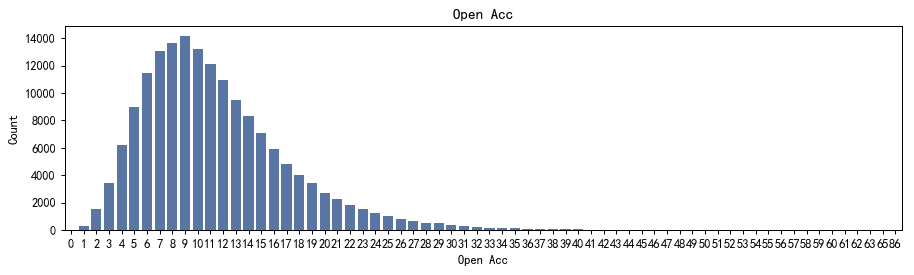

In [54]:
plotCount('open_acc','Open Acc')

In [55]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,11.284503,5.885440,0.0,7.0,10.0,14.0,55.0
Fully Paid,128282.0,11.460813,5.894895,0.0,7.0,10.0,14.0,86.0


### 11.mort_acc

In [56]:
df['mort_acc'].describe()

count    167452.000000
mean          1.431873
std           1.765112
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          24.000000
Name: mort_acc, dtype: float64

In [57]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,1.100306,1.572512,0.0,0.0,0.0,2.0,15.0
Fully Paid,128282.0,1.533115,1.807790,0.0,0.0,1.0,2.0,24.0


### 12.acc_now_delinq

In [58]:
df.groupby('loan_status')['acc_now_delinq'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.000153,0.012376,0.0,0.0,0.0,0.0,1.0
Fully Paid,128282.0,0.000031,0.005584,0.0,0.0,0.0,0.0,1.0


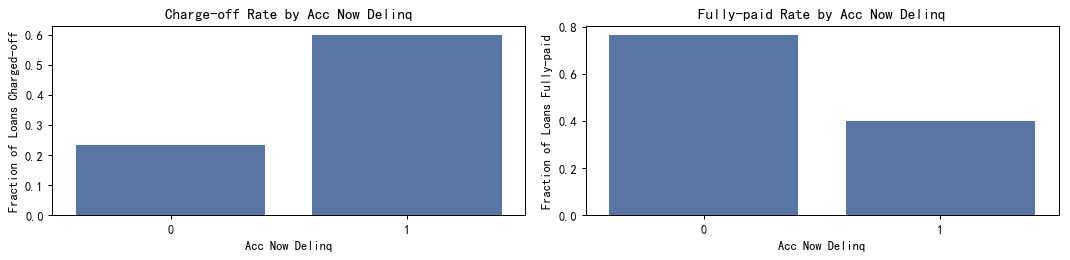

In [59]:
plotBar('acc_now_delinq','Acc Now Delinq')

### 13.avg_cur_bal

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


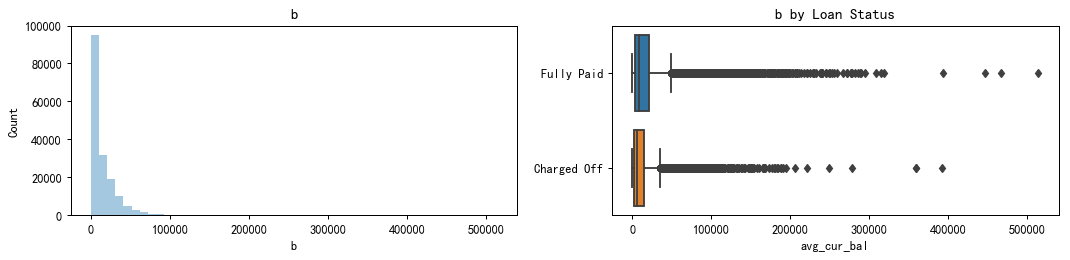

In [60]:
plotBox('avg_cur_bal','b')

### 14.bc_util

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


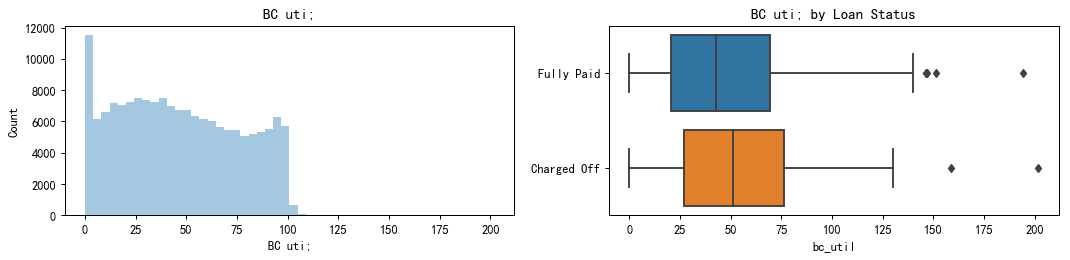

In [61]:
plotBox('bc_util','BC uti;')

### 15.chargeoff_within_12_mths

In [62]:
df.groupby('loan_status')['chargeoff_within_12_mths'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.009038,0.105117,0.0,0.0,0.0,0.0,3.0
Fully Paid,128282.0,0.007780,0.104402,0.0,0.0,0.0,0.0,9.0


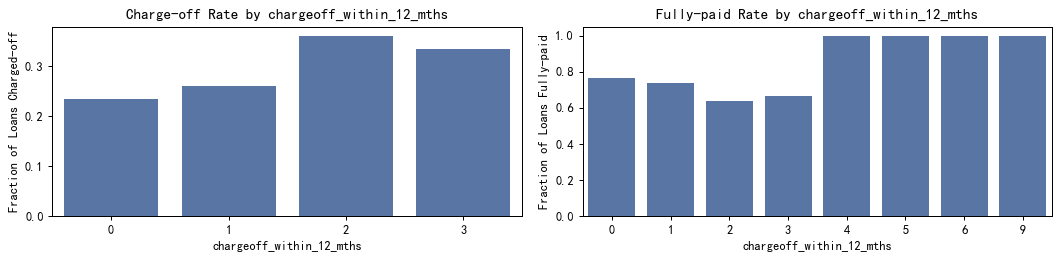

In [63]:
plotBar('chargeoff_within_12_mths','chargeoff_within_12_mths')

### 16.delinq_2yrs

In [64]:
df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.253204,0.779088,0.0,0.0,0.0,0.0,23.0
Fully Paid,128282.0,0.226930,0.738757,0.0,0.0,0.0,0.0,23.0


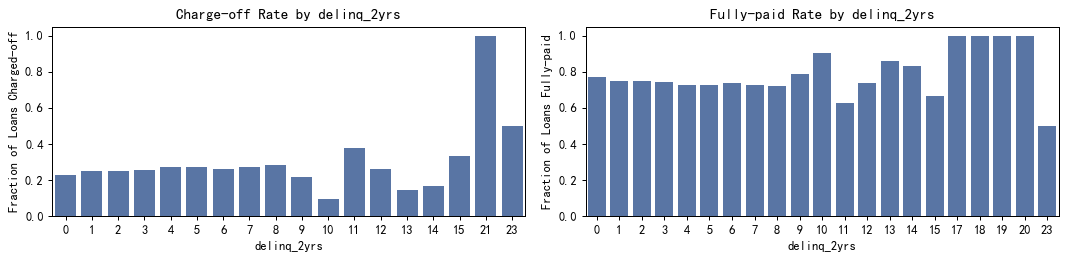

In [65]:
plotBar('delinq_2yrs','delinq_2yrs')

### 17.delinq_amnt

In [66]:
# df['log_delinq_amnt']=df['delinq_amnt'].apply(lambda x: np.log10(x+1)) 

In [67]:
df.groupby('loan_status')['delinq_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,4.593949,304.977325,0.0,0.0,0.0,0.0,33781.0
Fully Paid,128282.0,1.823935,244.157397,0.0,0.0,0.0,0.0,65000.0


### 18.il_util

In [68]:
df.groupby('loan_status')['il_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,32303.0,70.994768,22.973944,0.0,58.0,74.0,87.0,417.0
Fully Paid,108309.0,70.180908,22.889565,0.0,57.0,73.0,86.0,316.0


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


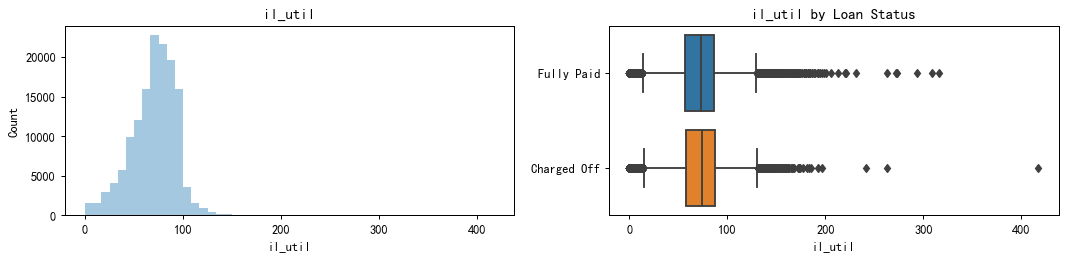

In [69]:
plotBox('il_util','il_util')

### 19.last_fico_range_high,last_fico_range_low

In [70]:
df[['last_fico_range_low', 'last_fico_range_high']].describe()

,last_fico_range_low,last_fico_range_high
count,167452.000000,167452.000000
mean,661.875314,682.178075
std,143.500510,82.557417
min,0.000000,0.000000
25%,640.000000,644.000000
50%,695.000000,699.000000
75%,735.000000,739.000000
max,845.000000,850.000000


In [71]:
df['last_fico_score']=0.5*df['last_fico_range_low']+0.5*df['last_fico_range_high']
df.drop(columns=['last_fico_range_low','last_fico_range_high'],axis=1,inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
df.groupby('loan_status')['last_fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,528.525223,121.560951,249.5,517.0,552.0,592.0,847.5
Fully Paid,128282.0,715.843852,51.204875,0.0,687.0,717.0,747.0,847.5


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


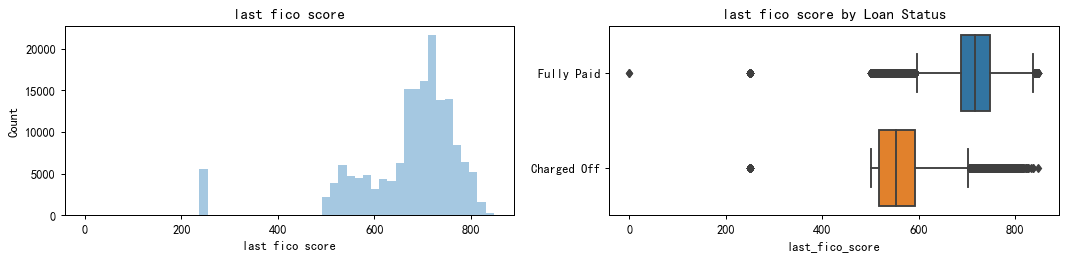

In [73]:
plotBox('last_fico_score','last fico score')     #由图可以看出该特征具有较大差异

### 20.num_accts_ever_120_pd

In [74]:
df.groupby('loan_status')['num_accts_ever_120_pd'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.513071,1.387513,0.0,0.0,0.0,0.0,34.0
Fully Paid,128282.0,0.493849,1.403650,0.0,0.0,0.0,0.0,36.0


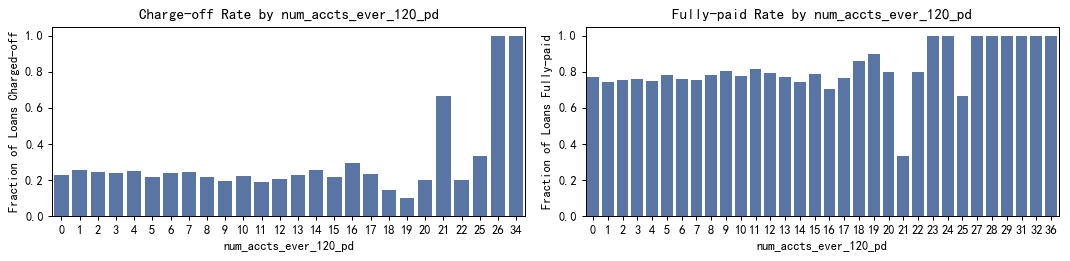

In [75]:
plotBar('num_accts_ever_120_pd','num_accts_ever_120_pd')

### 21.num_actv_rev_tl

In [76]:
df.groupby('loan_status')['num_actv_rev_tl'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,5.460735,3.520618,0.0,3.0,5.0,7.0,34.0
Fully Paid,128282.0,4.948995,3.223516,0.0,3.0,4.0,6.0,72.0


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


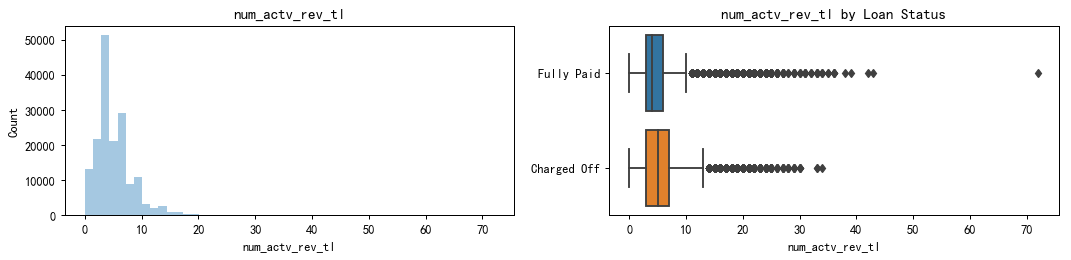

In [77]:
plotBox('num_actv_rev_tl','num_actv_rev_tl')

### 22.num_sats

In [78]:
df.groupby('loan_status')['num_sats'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,11.258642,5.877307,0.0,7.0,10.0,14.0,55.0
Fully Paid,128282.0,11.437676,5.888525,0.0,7.0,10.0,14.0,82.0


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


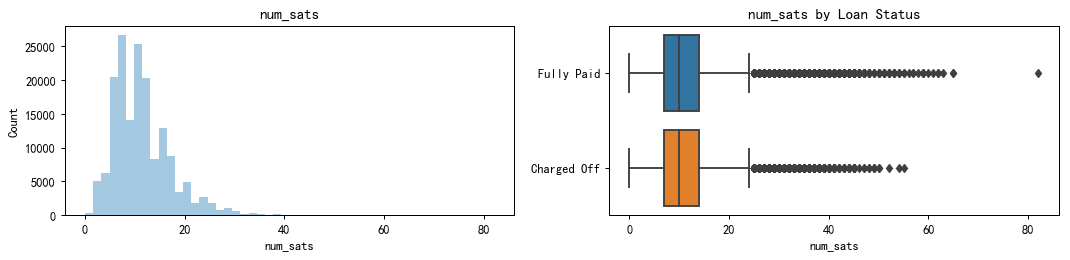

In [79]:
plotBox('num_sats','num_sats')

### 23.num_tl_120dpd_2m

In [80]:
df.groupby('loan_status')['num_tl_120dpd_2m'].describe()    #全0或者nan，无用，直接删除

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,37344.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,125621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df.drop('num_tl_120dpd_2m',axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 24.num_tl_30dpd   

> 考虑对30天逾期和90天合并处理，120天无效数据

In [82]:
df.groupby('loan_status')['num_tl_30dpd'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.000153,0.012376,0.0,0.0,0.0,0.0,1.0
Fully Paid,128282.0,0.000031,0.005584,0.0,0.0,0.0,0.0,1.0


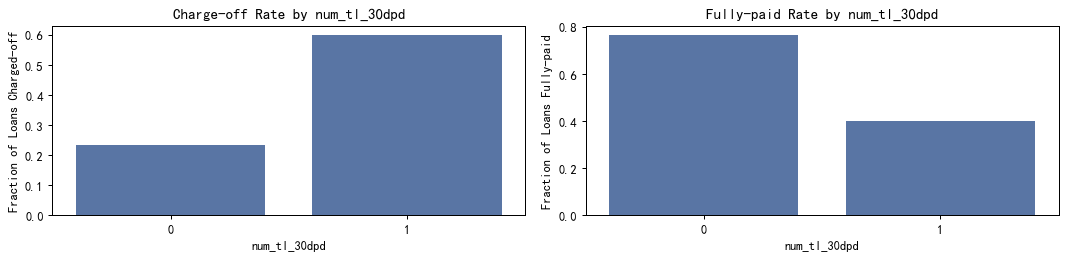

In [83]:
plotBar('num_tl_30dpd','num_tl_30dpd')

###  25.num_tl_90g_dpd_24m

In [84]:
df.groupby('loan_status')['num_tl_90g_dpd_24m'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,0.071483,0.433238,0.0,0.0,0.0,0.0,21.0
Fully Paid,128282.0,0.061178,0.419880,0.0,0.0,0.0,0.0,23.0


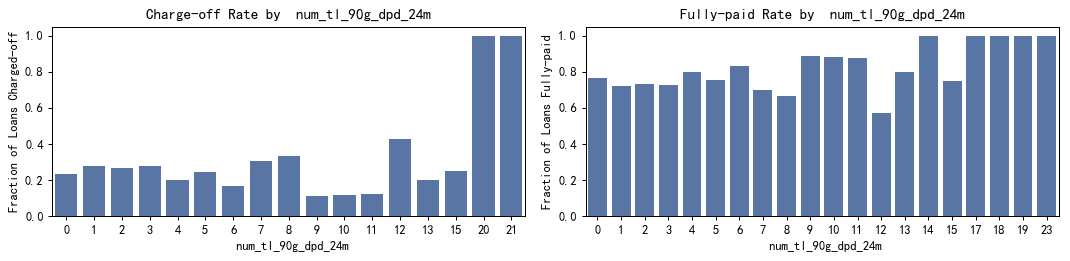

In [85]:
plotBar('num_tl_90g_dpd_24m',' num_tl_90g_dpd_24m')

### 26.hardship_flag

In [86]:
df.groupby('loan_status')['hardship_flag'].describe()     #全为N，无效数据，删除

,count,unique,top,freq
loan_status,,,,
Charged Off,39170,1,N,39170
Fully Paid,128282,1,N,128282


In [87]:
df['hardship_flag'].value_counts()

N    167452
Name: hardship_flag, dtype: int64

In [88]:
df.drop('hardship_flag',axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


###  27.open_act_il

In [89]:
df.groupby('loan_status')['open_act_il'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,39170.0,2.520577,2.746853,0.0,1.0,2.0,3.0,38.0
Fully Paid,128282.0,2.718441,2.927176,0.0,1.0,2.0,3.0,49.0


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


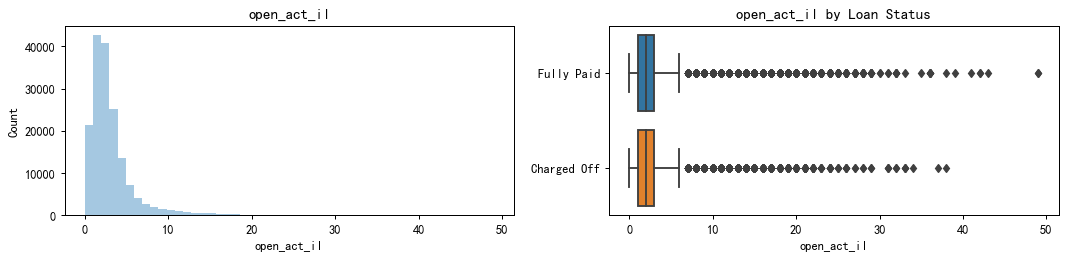

In [90]:
plotBox('open_act_il','open_act_il')

In [91]:
df.head()

,id,loan_status,acc_now_delinq,addr_state,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,emp_length,sub_grade,home_ownership,il_util,int_rate,num_accts_ever_120_pd,num_actv_rev_tl,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,open_acc,open_act_il,mort_acc,grade,log_annual_inc,fico_score,last_fico_score
0,130910225,Fully Paid,0,TX,10977.0,50.0,0,0,0,20.25,0.0,B5,MORTGAGE,102.0,0.1198,3,2,13,0,0,13,6,0,B,4.602071,697.0,647.0
1,130942737,Fully Paid,0,NY,8551.0,38.4,0,1,0,15.76,10.0,D4,OWN,NaN,0.2039,0,7,15,0,0,15,1,3,D,4.929424,667.0,652.0
2,130951046,Fully Paid,0,NY,2603.0,9.9,0,0,0,4.09,10.0,B1,MORTGAGE,41.0,0.0943,0,2,6,0,0,6,1,0,B,5.176094,732.0,777.0
3,130967561,Fully Paid,0,NC,6373.0,26.5,0,0,0,30.76,6.0,B4,MORTGAGE,91.0,0.1090,1,4,12,0,0,12,3,1,B,5.012841,722.0,787.0
4,130965526,Charged Off,0,NY,17568.0,33.1,0,0,0,14.26,7.0,C5,MORTGAGE,59.0,0.1601,0,3,13,0,0,13,3,1,C,4.973132,742.0,562.0


## 处理空值与编码

In [92]:
clean_loan_status={'loan_status': {'Fully Paid':0,'Charged Off':1}}
df.replace(clean_loan_status,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [93]:
clean_home_ownership={'home_ownership':{'MORTGAGE':4,'RENT':3,'OWN':2,'ANY':1}}
df.replace(clean_home_ownership,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [94]:
len(df['sub_grade'].value_counts())

35

In [95]:
df['grade'].value_counts()

B    45669
C    43772
A    40881
D    26845
E     8373
F     1547
G      365
Name: grade, dtype: int64

In [96]:
df.drop('sub_grade',axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [97]:
df['grade']=df['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
df.shape

(167452, 26)

In [99]:
df.head()

,id,loan_status,acc_now_delinq,addr_state,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,emp_length,home_ownership,il_util,int_rate,num_accts_ever_120_pd,num_actv_rev_tl,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,open_acc,open_act_il,mort_acc,grade,log_annual_inc,fico_score,last_fico_score
0,130910225,0,0,TX,10977.0,50.0,0,0,0,20.25,0.0,4,102.0,0.1198,3,2,13,0,0,13,6,0,6,4.602071,697.0,647.0
1,130942737,0,0,NY,8551.0,38.4,0,1,0,15.76,10.0,2,NaN,0.2039,0,7,15,0,0,15,1,3,4,4.929424,667.0,652.0
2,130951046,0,0,NY,2603.0,9.9,0,0,0,4.09,10.0,4,41.0,0.0943,0,2,6,0,0,6,1,0,6,5.176094,732.0,777.0
3,130967561,0,0,NC,6373.0,26.5,0,0,0,30.76,6.0,4,91.0,0.1090,1,4,12,0,0,12,3,1,6,5.012841,722.0,787.0
4,130965526,1,0,NY,17568.0,33.1,0,0,0,14.26,7.0,4,59.0,0.1601,0,3,13,0,0,13,3,1,5,4.973132,742.0,562.0


In [100]:
df=pd.get_dummies(df,columns=['addr_state'])

In [101]:
df.shape

(167452, 75)

In [102]:
missing_fractions = df.isnull().mean().sort_values(ascending=False) 
print(missing_fractions[missing_fractions>0])

il_util        0.160285
emp_length     0.087201
bc_util        0.016028
dti            0.002592
avg_cur_bal    0.000072
dtype: float64


In [103]:
df.fillna(df.mean(),inplace=True)    #中位数填充

In [104]:
df.head()

,id,loan_status,acc_now_delinq,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,emp_length,home_ownership,il_util,int_rate,num_accts_ever_120_pd,num_actv_rev_tl,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,open_acc,open_act_il,mort_acc,grade,log_annual_inc,fico_score,last_fico_score,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,130910225,0,0,10977.0,50.0,0,0,0,20.25,0.0,4,102.000000,0.1198,3,2,13,0,0,13,6,0,6,4.602071,697.0,647.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,130942737,0,0,8551.0,38.4,0,1,0,15.76,10.0,2,70.367878,0.2039,0,7,15,0,0,15,1,3,4,4.929424,667.0,652.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,130951046,0,0,2603.0,9.9,0,0,0,4.09,10.0,4,41.000000,0.0943,0,2,6,0,0,6,1,0,6,5.176094,732.0,777.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,130967561,0,0,6373.0,26.5,0,0,0,30.76,6.0,4,91.000000,0.1090,1,4,12,0,0,12,3,1,6,5.012841,722.0,787.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,130965526,1,0,17568.0,33.1,0,0,0,14.26,7.0,4,59.000000,0.1601,0,3,13,0,0,13,3,1,5,4.973132,742.0,562.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 开始训练

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
models = []
models.append(('逻辑回归', LogisticRegression()))
models.append(('决策树', DecisionTreeClassifier()))
models.append(('随机森林',RandomForestClassifier()))

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [106]:
X_train, X_val, Y_train, Y_val = train_test_split(df.drop(columns=['id','loan_status']), df[['loan_status']], test_size=0.3)

In [108]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    scores.append(accuracy_score(Y_val, Y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, '精度': scores})    #accuracy为0-1
print(tr_split)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


   Name        精度
0  逻辑回归  0.941914
1   决策树  0.912095
2  随机森林  0.943925
